In [1]:
# **DATA PROCESSING**

import numpy as np # Array Processing
import pandas as pd # Data Processing
import os # Input

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots

# **PRE PROCESSING**

from sklearn.preprocessing import StandardScaler # Scaling of Data
from imblearn.over_sampling import RandomOverSampler # Sampling of Data

# **NEURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**
from sklearn.metrics import accuracy_score
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


Lets get our data into working

In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

It is a good practice to take a look at our dataset before processing it

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


So the data set has $10000$ rows and $14$ columns accounting to $140000$ values. This huge number of data will really help us in making a good model

`RowNumber` `CustomerId` `Surname` is unique for every row and may decrease the efficiency of the model. So lets delete this column

In [4]:
df.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1 , inplace = True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Computer feels easier to understand and work on numerical value instead of string values. So lets get the datatypes of these values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Lets create dumies for categorical values

In [7]:
data =pd.get_dummies(df , columns = ["Geography" , "Gender"] , drop_first = True)

In [8]:
data.isnull().values.any()

False

As we can see there arent any null values. So we can get through this. Just in case if you find any null values at this step. You can use the code below to get rid of them. There are different approaches eliminating this problem and this is one of them that is commonly used
```
for i in df.columns:
    if df[i].isnull().values.any():
        df[i].fillna(df[i].mean() , axis = 0 , inplace = True)
```

Lets see how many values of 1 and 0s are there in the value

In [9]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

As we can see $1$ are $2037$ and $0$ aare $7963$ which are almost half, this can lead to bad effieicncy of the model. We will use [RandomOverSmapling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) from [imblearn.over_sampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

We can see that some data are in 100s and some are just 0/1. This can lead to baising in our model towards one feature. We need to scale the data accordingly We will be using [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html). 

In [10]:
train , test = np.split(data.sample(frac = 1) , [int(0.8*len(df))])

In [11]:
def pre(dataframe , oversampling = True):
    x = dataframe.drop("Exited" , axis = 1)
    y = dataframe["Exited"]
    
    sc = StandardScaler()
    ros = RandomOverSampler()
    
    sc.fit_transform(x , y)
    
    if oversampling:
        ros.fit_resample(x ,y)
    
    return x , y

In [12]:
X_train , Y_train = pre(train , oversampling = True)

RandomOverSampler is not required in test dataset, as it has predictions to be made

In [13]:
X_test , Y_test = pre(test)

Our data is good to go for modeling. Lets make the neural network

This neural network will be having $11$ input perceptrons/neurons in the input layer. The hidden layer consisits of $1$ layer with $11$ nodes giving the $1$ outplut node with `sigmoid` as activation

In [14]:
model = Sequential()
model.add(Dense(11 , activation = "relu" , input_dim = 11))
model.add(Dense(11 , activation = "relu" , input_dim = 11))
model.add(Dense(1 , activation = "sigmoid"))

2023-02-07 16:50:07.012895: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Lets get a summary of our model to check the things one 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


Now we will compile the model with the following attributes

In [16]:
model.compile(loss = "binary_crossentropy" , optimizer = "Adam" , metrics = ["accuracy"])

Now lets fit our model accordingly

In [17]:
hitstory = model.fit(X_train , Y_train , epochs = 100 , validation_split = 0.2)

2023-02-07 16:50:07.326329: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 12230.5508 - accuracy: 0.5117 - val_loss: 527.9493 - val_accuracy: 0.7131
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 204.7537 - accuracy: 0.6783 - val_loss: 70.5164 - val_accuracy: 0.7475
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 37.2617 - accuracy: 0.6578 - val_loss: 13.1619 - val_accuracy: 0.6519
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 24.5751 - accuracy: 0.6633 - val_loss: 12.0422 - val_accuracy: 0.7069
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 31.9662 - accuracy: 0.6770 - val_loss: 32.8895 - val_accuracy: 0.7681
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 28.5644 - accuracy: 0.6744 - val_loss: 16.3078 - val_accuracy: 0.7119
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 27.5519 - accuracy: 0.6797 - val_loss: 16.8199 - v

As we have trained our model, now lets test it 

In [18]:
y_log = model.predict(X_test)

As the values are in integer format but we need only 0 or 1, we need to pass the model through a condition

In [19]:
y_pred = np.where(y_log > 0.5 , 1 , 0)

In [20]:
print(accuracy_score(Y_test , y_pred))

0.775


Thats not quite a good accuracy, but we will go for it, and improve it further

Its a good practice to take a look at our model losses

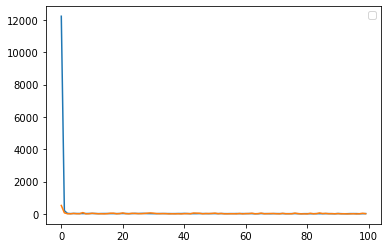

In [21]:
plt.plot(hitstory.history["loss"])
plt.plot(hitstory.history["val_loss"])
plt.legend()

As we can see, after $5$ epochs the metrics were the best, so we actually do not need that much epochs

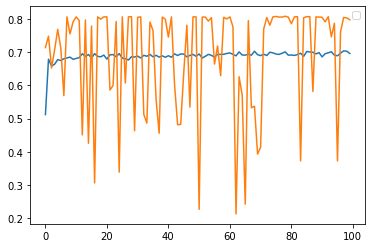

In [22]:
plt.plot(hitstory.history["accuracy"])
plt.plot(hitstory.history["val_accuracy"])
plt.legend()

**THATS IT FOR TODAY GUYS**

**IF YOU LIKED MY WORK, PLEASE MAKE AN UPVOTE :)**

**WORKING MORE ON IMPROVING IT**

# Version Info

* **Version 1 - Raw Code**
* **Version 2 - Documentation**